In [42]:
path = '/Users/simonbian/大三下/CS470/project/combined.csv'
import pandas as pd
df = pd.read_csv(path)
df_small = df.copy()

/var/folders/0p/bfk7s5314wzfkww172k0x4280000gn/T/ipykernel_50049/617801956.py:3: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [43]:
df_small['GPA'] = df_small['GPA'].str.replace("GPA ", "")
df_small[['Status','Date']]=df_small['Status_Date'].str.split(' ', n=1, expand=True)
import numpy as np
def extract_scores(row):
    if pd.isna(row):
        return np.nan, np.nan, np.nan  # Handle NA entries
    parts = row.split(';')
    gre_q, gre_v, gre_aw = np.nan, np.nan, np.nan
    for part in parts:
        if 'GRE ' in part and 'V' not in part and 'AW' not in part:
            gre_q = part.split()[-1]
        elif 'GRE V' in part:
            gre_v = part.split()[-1]
        elif 'GRE AW' in part:
            gre_aw = part.split()[-1]
    return gre_q, gre_v, gre_aw
df_small['GRE_Q'], df_small['GRE_V'], df_small['GRE_AW'] = zip(*df_small['GRE_Stats'].apply(extract_scores))

# Convert the new columns to numeric, handling errors
df_small['GRE_Q'] = pd.to_numeric(df_small['GRE_Q'], errors='coerce')
df_small['GRE_V'] = pd.to_numeric(df_small['GRE_V'], errors='coerce')
df_small['GRE_AW'] = pd.to_numeric(df_small['GRE_AW'], errors='coerce')
df_small[['Major','School']]=df_small['Major_School'].str.split(' ', n=1, expand=True)
df_small['GRE_Q_V']=df_small['GRE_Q']+df_small["GRE_V"]


In [44]:
df_small[['GRE_Q_V','Status','GPA','GRE_AW']].to_csv("full.csv",index='False')

/var/folders/x3/l5fypws56kx7pjjk4l67qk1w0000gn/T/ipykernel_1738/755589585.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



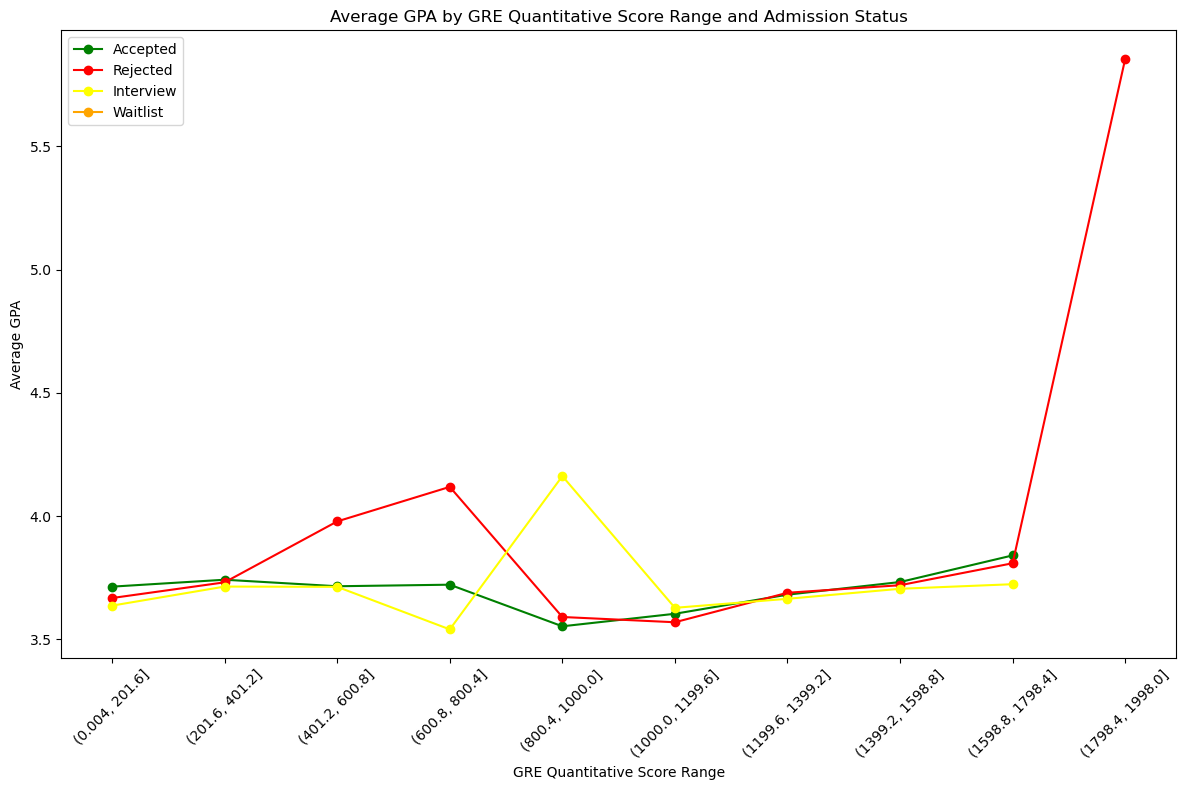

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming data is already loaded and cleaned as per your setup
data = pd.read_csv('/Users/amirnazif/Downloads/full.csv')
cleaned_data = data.dropna(subset=['GRE_Q_V', 'GPA', 'GRE_AW'])

# Bin GRE_Q_V into ranges for line graph purposes
cleaned_data['GRE_Q_V_bin'] = pd.cut(cleaned_data['GRE_Q_V'], bins=10)  # Adjust the bins as needed

# Group by the new bins and the status, then calculate average GPA
grouped_data = cleaned_data.groupby(['GRE_Q_V_bin', 'Status'])['GPA'].mean().reset_index()

# Define the status categories and colors
status_categories = ['Accepted', 'Rejected', 'Interview', 'Waitlist']
colors = ['green', 'red', 'yellow', 'orange']

plt.figure(figsize=(12, 8))

# Plot each status category as a separate line
for status, color in zip(status_categories, colors):
    subset = grouped_data[grouped_data['Status'].str.lower() == status.lower()]
    # Convert the interval index to strings for plotting
    x_labels = subset['GRE_Q_V_bin'].astype(str)
    plt.plot(x_labels, subset['GPA'], label=status, color=color, marker='o')

plt.xticks(rotation=45)
plt.title('Average GPA by GRE Quantitative Score Range and Admission Status')
plt.xlabel('GRE Quantitative Score Range')
plt.ylabel('Average GPA')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming data is already loaded and cleaned as per your setup
data = pd.read_csv('/Users/amirnazif/Downloads/full.csv')